In [187]:
import numpy as np
import matplotlib.pyplot as plt

In [188]:
data1 = np.load('../xi_calculation_visualization/data_for_xi_calculation/dX_data_t=50_to_t=100_grid_64_c_1by64.npz')

In [189]:
data1.files

['dX_x', 'dX_y']

In [190]:
# combining the data
dX1 = data1['dX_x']
dX2 = data1['dX_y']

In [191]:
dX1.shape, dX2.shape # the data is for 500 time-steps

((500, 49409), (500, 49409))

In [192]:
dX = np.concatenate((dX1, dX2), axis=1)
dX.shape

(500, 98818)

In [193]:
from numpy import linalg as LA
from scipy import signal

In [194]:
Dt_c = 0.1 # time-step size for 64x64 grid
scaled_dX = dX*np.sqrt(Dt_c)

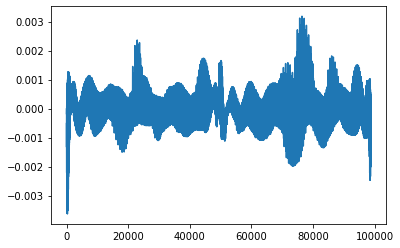

In [195]:
xi_0 = np.mean(scaled_dX, axis=0)
plt.plot(xi_0)

In [196]:
xi_0 = np.reshape(xi_0, (1, -1))
xi_0.shape

(1, 98818)

In [197]:
F = signal.detrend(scaled_dX, axis=0, type='constant')
F.shape

(500, 98818)

In [198]:
A, b, CT = LA.svd(F, full_matrices=False)

In [199]:
print(b) # variances of the EOFs 

[2.74147161e+00 2.06767840e+00 1.99334413e+00 1.89111375e+00
 1.67775837e+00 1.53692665e+00 1.42943983e+00 1.38431673e+00
 1.32069838e+00 1.23809165e+00 1.11063051e+00 1.10487942e+00
 1.08456857e+00 1.00949823e+00 9.42633940e-01 9.20842101e-01
 8.76133924e-01 8.38209337e-01 8.34782622e-01 8.09820389e-01
 7.90359755e-01 7.35794078e-01 7.16252751e-01 6.84696038e-01
 6.43958002e-01 6.10321671e-01 5.88524337e-01 5.82486900e-01
 5.55227193e-01 5.33084516e-01 5.23385572e-01 4.93153431e-01
 4.82887993e-01 4.69717548e-01 4.53073334e-01 4.48246834e-01
 4.42289010e-01 4.01300807e-01 3.81784386e-01 3.59471753e-01
 3.52738796e-01 3.44248057e-01 3.36372475e-01 3.33058276e-01
 3.07567582e-01 2.98430902e-01 2.94789342e-01 2.75747021e-01
 2.63159182e-01 2.62250199e-01 2.62216281e-01 2.57179757e-01
 2.40719282e-01 2.37745758e-01 2.28714973e-01 2.16974071e-01
 2.11973068e-01 2.03215483e-01 2.00723765e-01 1.90816016e-01
 1.76099450e-01 1.74354646e-01 1.70213875e-01 1.66968832e-01
 1.61881428e-01 1.586500

In [200]:
B = np.diag(b) # matrix containing variances

In [201]:
A.shape, B.shape, CT.shape

((500, 500), (500, 500), (500, 98818))

In [202]:
t_mat = np.matmul(A,B) # matrix containig time-series info
t_mat.shape

(500, 500)

In [203]:
xi_mat = CT # this matrix contain the EOFs

32 EOFs contain 90 percent of the total variance. Therefore we only extract this info from SVD of F

In [204]:
n_EOFs = 32

In [205]:
D = np.matmul(t_mat[:,:n_EOFs], xi_mat[:n_EOFs,:]) # info corresponding to 32 EOFs
t_mat[:,:n_EOFs].shape, xi_mat[:n_EOFs,:].shape, D.shape

((500, 32), (32, 98818), (500, 98818))

In [206]:
E = xi_0 + D # this should be approximately equal to matrix scaled_dX
# E = D #  not including the mean has very small effect on the final matrix
E.shape

(500, 98818)

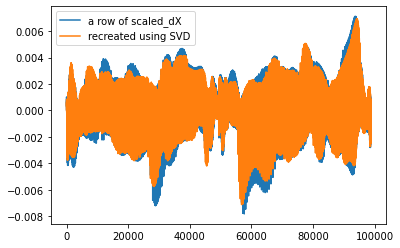

In [207]:
# rand_ele = int(np.random.uniform(0, 200))
rand_ele = 0
plt.plot(scaled_dX[rand_ele, :], label='a row of scaled_dX')
plt.plot(E[rand_ele,:], label='recreated using SVD')
plt.legend()

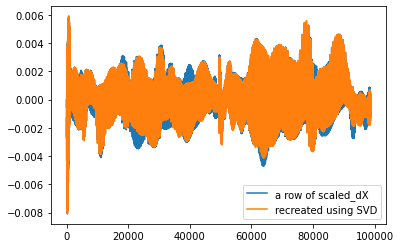

In [208]:
rand_ele = 300
plt.plot(scaled_dX[rand_ele, :], label='a row of scaled_dX')
plt.plot(E[rand_ele,:], label='recreated using SVD')
plt.legend()

In [209]:
combined_vec = E
detached_vec = np.zeros((combined_vec.shape[0],int(combined_vec.shape[1]/2),2))
for i in range(combined_vec.shape[0]):
    detached_vec[i,:,0] = combined_vec[i,:int(combined_vec.shape[1]/2)]
    detached_vec[i,:,1] = combined_vec[i,int(combined_vec.shape[1]/2):]
    
combined_vec.shape, detached_vec.shape

((500, 98818), (500, 49409, 2))

In [215]:
stoch_f_mat = detached_vec
stoch_f_mat.shape

(500, 49409, 2)

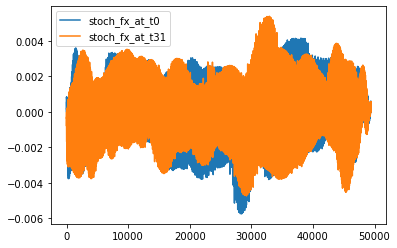

In [216]:
plt.plot(stoch_f_mat[0,:,0], label='stoch_fx_at_t0')
plt.plot(stoch_f_mat[31,:,0], label='stoch_fx_at_t31')
plt.legend()

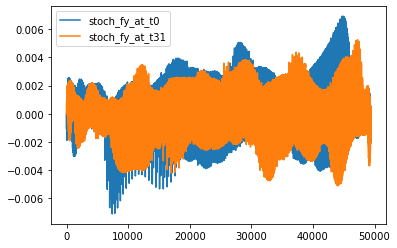

In [217]:
plt.plot(stoch_f_mat[0,:,1], label='stoch_fy_at_t0')
plt.plot(stoch_f_mat[31,:,1], label='stoch_fy_at_t31')
plt.legend()

In [218]:
data_file = './forcing/stochastic_forcing_as_deterministic_t50_to_t100.npz'

np.savez(data_file, stoch_f_mat = stoch_f_mat)